In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [67]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [68]:
train.info()
print('-'*10)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non

In [221]:
train_df = train.drop(['PassengerId','Ticket','Cabin'],axis=1)
test_df = test.drop(['PassengerId','Ticket','Cabin'],axis=1)

In [222]:
train_df['Embarked']=train_df['Embarked'].fillna('S')

In [223]:
train_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [224]:
train_df.describe(include=['O'])

,Name,Sex,Embarked
count,891,891,891
unique,891,2,3
top,"Flynn, Mr. James",male,S
freq,1,577,646


In [225]:
train_df['Title']=train_df['Name'].str.extract('(\w+\.)',expand=False)
test_df['Title']=train_df['Name'].str.extract('(\w+\.)',expand=False)

In [226]:
train_df.drop('Name',axis=1,inplace=True)
test_df.drop('Name',axis=1,inplace=True)

In [227]:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [228]:
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

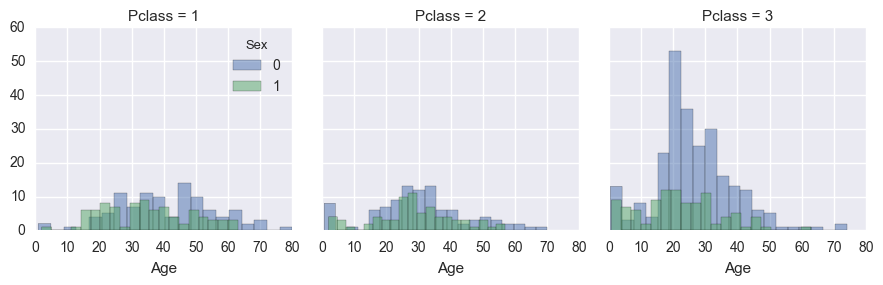

In [229]:
grid = sns.FacetGrid(train_df,col='Pclass',hue='Sex',legend_out=False)
grid.map(plt.hist,'Age',alpha=0.5,bins=20)
grid.add_legend()

In [230]:
train_df['Fill_Age']=train_df['Age']

In [231]:
test_df['Fill_Age']=test_df['Age']

In [232]:
guess_age=np.zeros((3,2))

In [233]:
for i in range(0,3):
    for j in range(0,2):
        guess_df = train_df.loc[(train_df['Pclass']==i+1)&(train_df['Sex']==j)]['Age'].dropna()
        guess_age[i,j]=int(guess_df.median())
guess_age

array([[ 40.,  35.],
       [ 30.,  28.],
       [ 25.,  21.]])

In [234]:
for i in range(0,3):
    for j in range(0,2):
        guess_df = train_df.loc[(train_df['Age'].isnull())&(train_df['Pclass']==i+1)&(train_df['Sex']==j),'Fill_Age'] = guess_age[i,j]

In [235]:
for i in range(0,3):
    for j in range(0,2):
        guess_df = test_df.loc[(test_df['Age'].isnull())&(test_df['Pclass']==i+1)&(test_df['Sex']==j),'Fill_Age'] = guess_age[i,j]

In [236]:
train_df[train_df['Age'].isnull()][['Pclass','Sex','Age','Fill_Age']].head(10)

,Pclass,Sex,Age,Fill_Age
5,3,0,NaN,25.0
17,2,0,NaN,30.0
19,3,1,NaN,21.0
26,3,0,NaN,25.0
28,3,1,NaN,21.0
29,3,0,NaN,25.0
31,1,1,NaN,35.0
32,3,1,NaN,21.0
36,3,0,NaN,25.0
42,3,0,NaN,25.0


In [237]:
train_df.drop('Age',axis=1,inplace=True)

In [238]:
test_df.drop('Age',axis=1,inplace=True)

In [239]:
test_df['Fare'].median()

14.4542

In [240]:
test_df['Fare']=test_df['Fare'].fillna(14.4542)

In [241]:
train_df['Fare']=train_df['Fare'].round(2)
test_df['Fare']=test_df['Fare'].round(2)

In [242]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex           int32
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Title        object
Fill_Age    float64
dtype: object

In [247]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Fill_Age
0,0,3,0,1,0,7.25,S,22.0
1,1,1,1,1,0,71.28,C,38.0
2,1,3,1,0,0,7.92,S,26.0
3,1,1,1,1,0,53.10,S,35.0
4,0,3,0,0,0,8.05,S,35.0


In [248]:
test_df.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Fill_Age
0,3,0,0,0,7.83,Q,34.5
1,3,1,1,0,7.00,S,47.0
2,2,0,0,0,9.69,Q,62.0
3,3,0,0,0,8.66,S,27.0
4,3,1,1,1,12.29,S,22.0


In [273]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [275]:
test_df['SibSp'].value_counts()

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

In [271]:
train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [272]:
test_df['Parch'].value_counts()

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

In [245]:
train_df.drop('Title',axis=1,inplace=True)

In [246]:
test_df.drop('Title',axis=1,inplace=True)

In [100]:
#train_df[['Pclass','Sex']]=train_df[['Pclass','Sex']].astype(object)

In [101]:
#test_df[['Pclass','Sex']]=test_df[['Pclass','Sex']].astype(object)

In [249]:
train_df['Embarked']=train_df['Embarked'].map({'S':2,'C':1,'Q':0}).astype(int)

In [250]:
test_df['Embarked']=test_df['Embarked'].map({'S':2,'C':1,'Q':0}).astype(int)

In [251]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex           int32
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
Fill_Age    float64
dtype: object

In [105]:
#train_df[['Fare','Fill_Age']]=train_df[['Fare','Fill_Age']].astype(int)

In [113]:
#test_df[['Fare','Fill_Age']]=test_df[['Fare','Fill_Age']].astype(int)

In [276]:
train_df = pd.get_dummies(train_df,columns=['Pclass','Sex','Embarked','SibSp','Parch'])

In [277]:
test_df = pd.get_dummies(test_df,columns=['Pclass','Sex','Embarked','SibSp','Parch'])

In [298]:
train_df['Parch_9']=0

In [ ]:
train

In [299]:
X = train_df.drop('Survived',axis=1)
y = train_df['Survived']

In [300]:
from sklearn.cross_validation import train_test_split

In [301]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.7)

In [152]:
#from sklearn.preprocessing import StandardScaler

In [153]:
#ss = StandardScaler()

In [154]:
#ss.fit(xtrain)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [155]:
#xtrain = ss.transform(xtrain)
#xtest = ss.transform(xtest)

In [ ]:
#logistic regression

In [302]:
from sklearn.linear_model import LogisticRegression

In [303]:
lr = LogisticRegression()

In [304]:
lr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [305]:
lr.score(xtest,ytest)

0.76119402985074625

In [306]:
yscore = lr.predict_proba(xtest)[:,1]

In [307]:
from sklearn.metrics import precision_recall_curve

In [308]:
precision, recall, thresholds = precision_recall_curve(ytest,yscore)

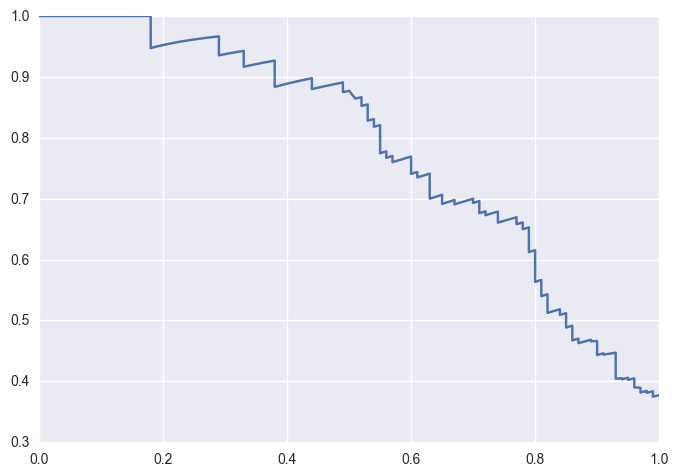

In [309]:
plt.plot(recall,precision)

In [ ]:
#randomforest

In [310]:
from sklearn.ensemble import RandomForestClassifier

In [311]:
rfc = RandomForestClassifier(n_estimators=100)

In [312]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [313]:
rfc.score(xtest,ytest)

0.78358208955223885

In [314]:
yscore = rfc.predict_proba(xtest)[:,1]

In [315]:
precision, recall, thresholds = precision_recall_curve(ytest,yscore)

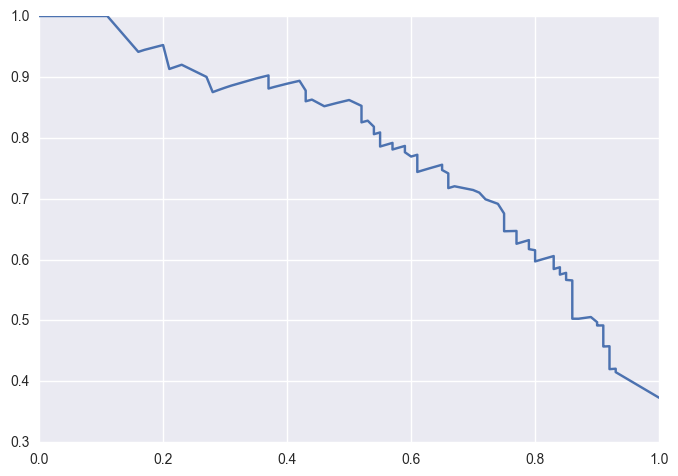

In [316]:
plt.plot(recall,precision)

In [317]:
y_pred = rfc.predict(test_df)

In [269]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':y_pred})

In [270]:
submission.to_csv('C:\\Users\\xupu\\Desktop\\submission.csv',index=False)